In [1]:
import pandas as pd

In [2]:
stats = pd.read_csv('data/PlayersStats_1971-2024.csv')
stats.head()

,Player,href,Year,Team,Tm,LatestTm,Pos,Age,G,GS,...,VORP,W,L,W/L%,SRS,Seed,MOV,ORtg,DRtg,NRtg
0,Kareem Abdul-Jabbar,abdulka01,1971,Milwaukee Bucks,MIL,MIL,C,23,82,NaN,...,NaN,66,16,0.805,11.92,1,12.26,NaN,NaN,NaN
1,Walt Hazzard,abdulma01,1971,Atlanta Hawks,ATL,ATL,PG,28,82,NaN,...,NaN,36,46,0.439,-1.30,5,-1.79,NaN,NaN,NaN
2,Zaid Abdul-Aziz,abdulza01,1971,Seattle SuperSonics,SEA,SEA,C,24,61,NaN,...,NaN,38,44,0.463,-1.53,8,-1.98,NaN,NaN,NaN
3,Don Adams,adamsdo01,1971,San Diego Rockets,SDR,SDR,SF,23,82,NaN,...,NaN,40,42,0.488,0.21,7,-0.24,NaN,NaN,NaN
4,Rick Adelman,adelmri01,1971,Portland Trail Blazers,POR,POR,PG,24,81,NaN,...,NaN,29,53,0.354,-6.20,9,-4.51,NaN,NaN,NaN


In [18]:
for col in stats.columns :
    nans = stats[col].isna().sum()
    if nans :
        first_idx = stats[col].notna().argmax()
        print(col, stats.iloc[first_idx]['Year'])

GS 1971
FG% 1971
3P 1980
3PA 1980
3P% 1980
2P% 1971
eFG% 1971
FT% 1971
ORB 1974
DRB 1974
STL 1974
BLK 1974
TOV 1978
PER 1971
TS% 1971
3PAr 1980
FTr 1971
ORB% 1974
DRB% 1974
TRB% 1971
AST% 1971
STL% 1974
BLK% 1974
TOV% 1978
USG% 1978
WS/48 1971
OBPM 1974
DBPM 1974
BPM 1974
VORP 1974
ORtg 1984
DRtg 1984
NRtg 1984


In [19]:
shares = pd.read_csv('data/SharesMVP_1971-2024.csv')
shares.head()

,Player,href,Year,Share
0,Kareem Abdul-Jabbar,abdulka01,1971,0.895
1,Jerry West,westje01,1971,0.213
2,Dave Bing,bingda01,1971,0.153
3,Willis Reed,reedwi01,1971,0.140
4,Oscar Robertson,roberos01,1971,0.081


In [26]:
data = stats.merge(shares, how = 'left', on = ['href', 'Year'], suffixes = ['', '_y']).drop(columns = ['Player_y'])
data['Share'] = data['Share'].fillna(0.)
data.head()

,Player,href,Year,Team,Tm,LatestTm,Pos,Age,G,GS,...,W,L,W/L%,SRS,Seed,MOV,ORtg,DRtg,NRtg,Share
0,Kareem Abdul-Jabbar,abdulka01,1971,Milwaukee Bucks,MIL,MIL,C,23,82,NaN,...,66,16,0.805,11.92,1,12.26,NaN,NaN,NaN,0.895
1,Walt Hazzard,abdulma01,1971,Atlanta Hawks,ATL,ATL,PG,28,82,NaN,...,36,46,0.439,-1.30,5,-1.79,NaN,NaN,NaN,0.000
2,Zaid Abdul-Aziz,abdulza01,1971,Seattle SuperSonics,SEA,SEA,C,24,61,NaN,...,38,44,0.463,-1.53,8,-1.98,NaN,NaN,NaN,0.000
3,Don Adams,adamsdo01,1971,San Diego Rockets,SDR,SDR,SF,23,82,NaN,...,40,42,0.488,0.21,7,-0.24,NaN,NaN,NaN,0.000
4,Rick Adelman,adelmri01,1971,Portland Trail Blazers,POR,POR,PG,24,81,NaN,...,29,53,0.354,-6.20,9,-4.51,NaN,NaN,NaN,0.000


In [49]:
features = ['Age', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%',
       'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'W', 'L', 'W/L%', 'SRS', 'Seed',
       'MOV', 'ORtg', 'DRtg', 'NRtg']

corr = data[features + ['Share']].corr()#.sort_values('Share', ascending = False)

In [30]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


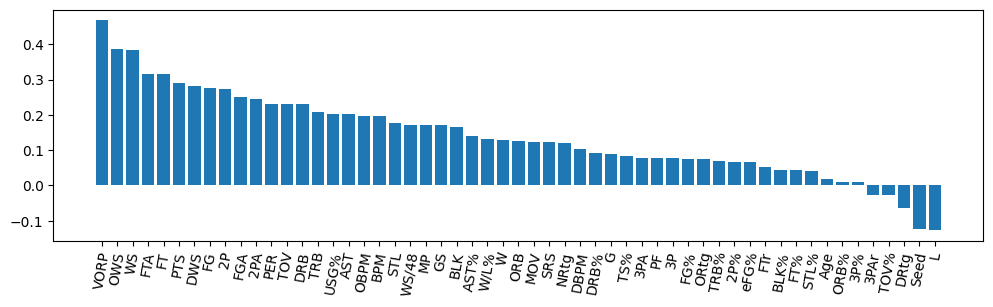

In [35]:
plt.figure(figsize = (12, 3))
plt.bar(corr.index[1:], corr['Share'][1:])
plt.xticks(rotation = 80)
plt.show()

In [39]:
import numpy as np

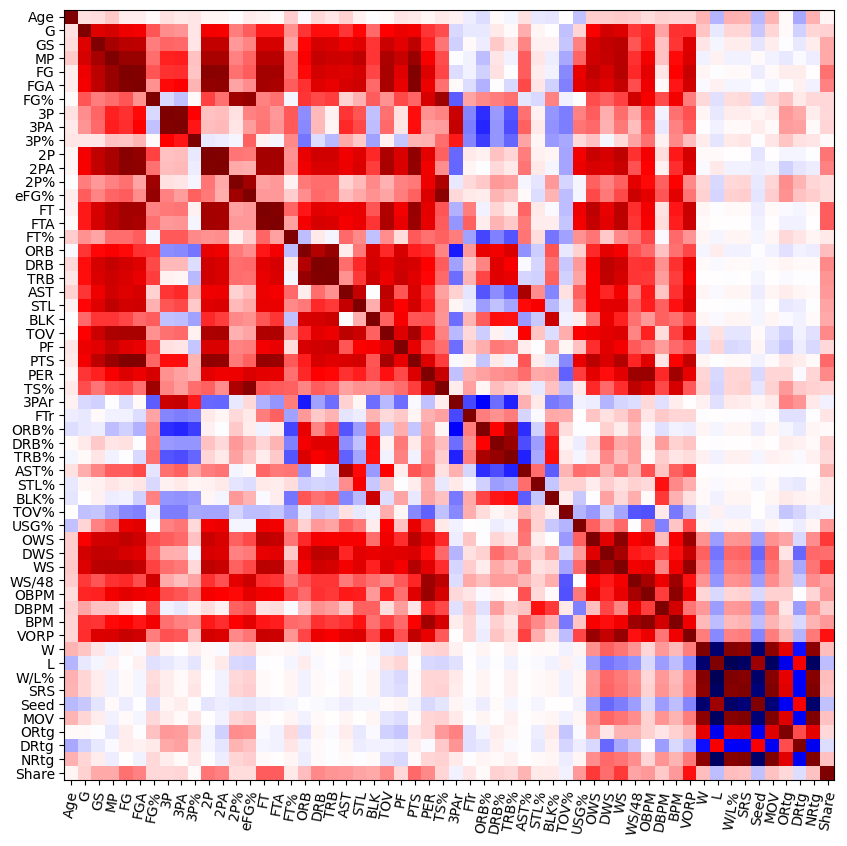

In [50]:
plt.figure(figsize = (10, 10))
plt.imshow(corr, cmap = 'seismic', vmin = -1, vmax = 1)
plt.xticks(np.arange(0, len(corr)), corr.columns, rotation = 80)
plt.yticks(np.arange(0, len(corr)), corr.index)
plt.show()

In [ ]:
features = ['VORP', 'WS', 'OWS', 'BPM', 'PER', 'PTS', 'FTA', 'OBPM', 'FG', 'USG%', 'Seed', 'MP', 'GS']
features = ['VORP', 'Seed']

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
model = RandomForestRegressor()

In [88]:
data = data.fillna(0.)

In [105]:
train = data.copy()[data['Year'] < 2024]
test  = data.copy()[data['Year'] == 2024]

In [106]:
X_train = np.array(train[features])
y_train = np.array(train['Share'])

X_test = np.array(test[features])
y_test = np.array(test['Share'])

In [91]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
y_pred = model.predict(X_test)

In [107]:
test['pred'] = y_pred

In [78]:
test.sort_values('Share', ascending = False).head(10)

,Player,href,Year,Team,Tm,LatestTm,Pos,Age,G,GS,...,L,W/L%,SRS,Seed,MOV,ORtg,DRtg,NRtg,Share,pred
21292,Nikola Jokić,jokicni01,2024,Denver Nuggets (2),DEN,DEN,C,28,79,79.0,...,25,0.695,5.23,1,5.26,119.49,114.05,5.44,0.935,0.94336
21201,Shai Gilgeous-Alexander,gilgesh01,2024,Oklahoma City Thunder (1),OKC,OKC,PG,25,75,75.0,...,25,0.695,7.36,1,7.41,120.43,113.12,7.31,0.646,0.70215
21157,Luka Dončić,doncilu01,2024,Dallas Mavericks (5),DAL,DAL,PG,24,70,70.0,...,32,0.610,2.30,5,2.21,118.38,116.28,2.09,0.572,0.33705
21040,Giannis Antetokounmpo,antetgi01,2024,Milwaukee Bucks (3),MIL,MIL,PF,29,73,73.0,...,33,0.598,2.44,3,2.62,119.12,116.49,2.64,0.194,0.45005
21105,Jalen Brunson,brunsja01,2024,New York Knicks (2),NYK,NYK,PG,27,77,77.0,...,32,0.610,4.36,2,4.59,119.11,114.22,4.89,0.143,0.19853
21517,Jayson Tatum,tatumja01,2024,Boston Celtics (1),BOS,BOS,PF,25,74,74.0,...,18,0.780,10.75,1,11.34,124.23,112.51,11.71,0.087,0.15117
21169,Anthony Edwards,edwaran01,2024,Minnesota Timberwolves (3),MIN,MIN,SG,22,79,78.0,...,26,0.683,6.39,3,6.45,116.63,109.98,6.65,0.018,0.01069
21472,Domantas Sabonis,sabondo01,2024,Sacramento Kings (9),SAC,SAC,C,27,82,82.0,...,36,0.561,2.29,9,1.74,117.68,116.01,1.67,0.003,0.04290
21166,Kevin Durant,duranke01,2024,Phoenix Suns (6),PHO,PHO,PF,35,75,75.0,...,33,0.598,3.08,6,3.06,118.78,115.69,3.09,0.001,0.02371
21411,Onyeka Okongwu,okongon01,2024,Atlanta Hawks (10),ATL,ATL,C,23,55,8.0,...,46,0.439,-2.38,10,-2.18,118.16,120.25,-2.09,0.000,0.00000


In [79]:
def model_evaluation(model, features, test_set, y_test, y_train) :

    y_pred = model.predict(test_set[features])
    test_set['Pred'] = y_pred

    # Simple MAE and R2
    mae = np.abs(y_pred - y_test).mean()
    r2 = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_train.mean()) ** 2).sum()

    # Players with votes
    withVotes = test_set[test_set['Share'] > 0].sort_values('Share', ascending = False).reset_index(drop = True)

    # MAE on players who received votes
    mae_votes = (withVotes['Pred'] - withVotes['Share']).abs().mean()

    # Rankings on players who received votes
    tau, _ = kendalltau(withVotes['Share'], withVotes['Pred'])
    
    # Store actual winner, top-3 and top-5
    winner = withVotes['href'].values[0]
    top3 = withVotes['href'].values[:3].tolist()
    top5 = withVotes['href'].values[:5].tolist()

    # Store predicted winner, top-3 and top-5
    sorted_pred = test_set.sort_values('Pred', ascending = False).reset_index(drop = True)
    pred_winner = sorted_pred['href'].values[0]
    pred_top3 = sorted_pred['href'].values[:3].tolist()
    pred_top5 = sorted_pred['href'].values[:5].tolist()

    # Accuracies on winner, top-3 and top-5
    acc1 = (winner == pred_winner)
    acc3 = len(set(top3).intersection(set(pred_top3))) / 3
    acc5 = len(set(top5).intersection(set(pred_top5))) / 5

    return mae, r2, mae_votes, tau, acc1, acc3, acc5

SyntaxError: incomplete input (3261629671.py, line 3)